::: {.content-visible unless-format="revealjs"}

<center>
<a class="h2" href="./slides.html" target="_blank">Open slides in new window &rarr;</a>
</center>

:::

# Data Structures: Motivation {data-stack-name="Data Structures"}

## Why Does The NYC Subway Have Express Lines? {.smaller .title-11}

![From <a href='https://www.centralpark.com/visitor-info/get-directions/' target='_blank'>NYC Central Park website</a>](images/subway_map_nyc.jpg){fig-align="center"}

## Why Stop At Two Levels? {.smaller}

![From <a href='https://blog.reachsumit.com/posts/2020/07/skip-list/' target='_blank'>Skip List Data Structure Explained</a>, Sumit's Diary blog](images/nyc-7.png){fig-align="center"}

## How TF Does Google Maps Work? {.smaller .crunch-iframe .crunch-title .crunch-ul}

* A (mostly) full-on answer: soon to come! Data structures for spatial data
* A step in that direction: **Quadtrees**! (**Fractal DC**)






```{=html}
<iframe src="https://jimkang.com/quadtreevis/" width="100%" height="450"></iframe>
```





<a href='https://jimkang.com/quadtreevis/' target='_blank'>Jim Kang's Quadtree Visualizations <i class='bi bi-box-arrow-up-right'></i></a>

# Algorithmic Complexity: Motivation {data-stack-name="Complexity"}

## The Secretly Exciting World of Matrix Multiplication

* Fun Fact 1: Most of modern Machine Learning is, at the processor level, just a bunch of matrix operations
* Fun Fact 2: The way we've all learned how to multiply matrices requires $O(N^3)$ operations, for two $N \times N$ matrices $A$ and $B$
* Fun Fact 3: $\underbrace{x^2 - y^2}_{\mathclap{\times\text{ twice, }\pm\text{ once}}} = \underbrace{(x+y)(x-y)}_{\times\text{once, }\pm\text{ twice}}$
* Fun Fact 4: These are not very fun facts at all

## Why Is Jeff Rambling About Matrix Math From 300 Years Ago? {.smaller}

* The way we all learned it in school (for $N = 2$):

$$
AB = \begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix} =
\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22} \\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}
\end{bmatrix}
$$

* 12 operations: 8 multiplications, 4 additions $\implies O(N^3) = O(2^3) = O(8)$
* Are we trapped? Like... what is there to do besides performing these $N^3$ operations, if we want to multiply two $N \times N$ matrices? Why are we about to move onto yet another slide about this?

## Block-Partitioning Matrices {.smaller}

* Now let's consider **big** matrices, whose dimensions are a power of 2 (for ease of illustration): $A$ and $B$ are now $N \times N = 2^n \times 2^n$ matrices
* We can "decompose" the matrix product $AB$ as:

$$
AB = \begin{bmatrix}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{bmatrix}
\begin{bmatrix}
B_{11} & B_{12} \\
B_{21} & B_{22}
\end{bmatrix} =
\begin{bmatrix}
A_{11}B_{11} + A_{12}B_{21} & A_{11}B_{12} + A_{12}B_{22} \\
A_{21}B_{11} + A_{22}B_{21} & A_{21}B_{12} + A_{22}B_{22}
\end{bmatrix}
$$

* Which gives us a **recurrence relation** representing the total number of computations required for this big-matrix multiplication: $T(N) = \underbrace{8T(N/2)}_{\text{Multiplications}} + \underbrace{\Theta(1)}_{\text{Additions}}$
* It turns out that (using a method we'll learn in Week 3), given this recurrence relation and our **base case** from the previous slide, this divide-and-conquer approach via block-partitioning doesn't help us: we still get $T(n) = O(n^3)$...
* So why is Jeff still torturing us with this example?

## Time For Some 🪄MATRIX MAGIC!🪄 {.smaller .crunch-title .crunch-ul .crunch-math .crunch-li .title-12}

::: {#matrix-magic-defn}

* If we define

$$
\begin{align*}
m_1 &= (a_{11}+a_{22})(b_{11}+b_{22}) \\
m_2 &= (a_{21}+a_{22})b_{11} \\
m_3 &= a_{11}(b_{12}-b_{22}) \\
m_4 &= a_{22}(b_{21}-b_{11}) \\
m_5 &= (a_{11}+a_{12})b_{22} \\
m_6 &= (a_{21}-a_{11})(b_{11}+b_{12}) \\
m_7 &= (a_{12}-a_{22})(b_{21}+b_{22})
\end{align*}
$$

:::
::: {#matrix-magic-result}

* Then we can combine these **seven** scalar products to obtain our matrix product:

$$
AB = \begin{bmatrix}
m_1 + m_4 - m_5 + m_7 & m_3 + m_5 \\
m_2 + m_4 & m_1 - m_2 + m_3 + m_6
\end{bmatrix}
$$

:::

* Total operations: 7 multiplications, 18 additions

## Block-Partitioned Matrix Magic {.smaller}

* Using the previous slide as our **base case** and applying this same method to the block-paritioned big matrices, we get the same result, but where the four entries in $AB$ here are now **matrices** rather than scalars:

$$
AB = \begin{bmatrix}
M_1 + M_4 - M_5 + M_7 & M_3 + M_5 \\
M_2 + M_4 & M_1 - M_2 + M_3 + M_6
\end{bmatrix}
$$

* We now have a **different recurrence relation**: $T(N) = \underbrace{7T(N/2)}_{\text{Multiplications}} + \underbrace{\Theta(N^2)}_{\text{Additions}}$
* And it turns out, somewhat miraculously, that the additional time required for the **increased number of additions** is **significantly less** than the **time savings** we obtain by doing 7 instead of 8 multiplications, since this method now runs in $T(N) = O(N^{\log_2(7)}) \approx O(N^{2.807}) < O(N^3)$ 🤯

# Sorting {data-stack-name="Sorting"}

* Your first "use case" for both **using a data structure** and **analyzing the complexity** of an operation on it!
* We'll start with simple approach (**insertion sort**), then more complicated approach (**merge sort**)
* Using complexity analysis, we'll see how (much like the matrix-multiplication example) simplest isn't always best D:

## Insertion Sort

* Think of how you might sort a deck of cards in your hand

![](images/cards.svg){fig-align="center"}

## Cards $\rightarrow$ List Elements {.smaller}

* Input list: `[5, 2, 4, 6, 1, 3]`

![](images/insertion_zero.svg){fig-align="center"}

* Notice how, at each point:
  1. There is a card we're currently "looking at", called the [**key**]{.cb2}, and
  2. There is an **invariant**: everything in the list [**before the key**]{.cb1} is **already sorted**
   
## Complexity Analysis {.smaller .crunch-title .crunch-ul .crunch-p .crunch-math}

* Let $t_i$ be the number of times the while loop runs, $\widetilde{n} = n - 1$:






```{=html}
<table>
<thead>
<tr>
    <th align="right"></th>
    <th>Code</th>
    <th>Cost</th>
    <th>Times Run</th>
</tr>
</thead>
<tbody>
<tr>
    <td align="right">1</td>
    <td><code><span class='bold-code'>for</span> i = 1 <span class='bold-code'>to</span> n-1:</code></td>
    <td><span data-qmd="$c_1$"></span></td>
    <td><span data-qmd="$\widetilde{n}$"></span></td>
</tr>
<tr>
    <td>2</td>
    <td><code>&nbsp;&nbsp;key = A[i]</code></td>
    <td><span data-qmd="$c_2$"></span></td>
    <td><span data-qmd="$\widetilde{n}$"></span></td>
</tr>
<tr>
    <td>3</td>
    <td><code style="color: #699754 !important;">&nbsp;&nbsp;# Insert A[i] into sorted subarray A[0:i-1]</code></td>
    <td><span data-qmd="$0$"></span></td>
    <td><span data-qmd="$\widetilde{n}$"></span></td>
</tr>
<tr>
    <td>4</td>
    <td><code>&nbsp;&nbsp;j = i - 1</code></td>
    <td><span data-qmd="$c_4$"></span></td>
    <td><span data-qmd="$\widetilde{n}$"></span></td>
</tr>
<tr>
    <td>5</td>
    <td><code>&nbsp;&nbsp;<span class='bold-code'>while</span> j >= 0 <span class='bold-code'>and</span> A[j] > key:</code></td>
    <td><span data-qmd="$c_5$"></span></td>
    <td><span data-qmd="$\sum_{i=2}^n t_i$"></span></td>
</tr>
<tr>
    <td>6</td>
    <td><code>&nbsp;&nbsp;&nbsp;&nbsp;A[j + 1] = A[j]</code></td>
    <td><span data-qmd="$c_6$"></span></td>
    <td><span data-qmd="$\sum_{i=2}^n(t_i - 1)$"></span></td>
</tr>
<tr>
    <td>7</td>
    <td><code>&nbsp;&nbsp;&nbsp;&nbsp;j = j - 1</code></td>
    <td><span data-qmd="$c_7$"></span></td>
    <td><span data-qmd="$\sum_{i=2}^n(t_i - 1)$"></span></td>
</tr>
<tr>
    <td>8</td>
    <td><code>&nbsp;&nbsp;A[j + 1] = key</code></td>
    <td><span data-qmd="$c_8$"></span></td>
    <td><span data-qmd="$\widetilde{n}$"></span></td>
</tr>
</tbody>
</table>
```






$$
T(n) = c_1\widetilde{n} + c_2\widetilde{n} + c_4\widetilde{n} + c_5\sum_{i=2}^nt_i + c_6\sum_{i=2}^n(t_i - 1) + c_7\sum_{i=2}^n(t_i-1) + c_8\widetilde{n}
$$

## Simplifying {.smaller .crunch-title .crunch-ul .crunch-math .math-95}

* The original, scary-looking equation:

$$
T(n) = c_1n + c_2\widetilde{n} + c_4\widetilde{n} + c_5{\color{orange}\boxed{\color{black}\sum_{i=2}^nt_i}} + c_6{\color{lightblue}\boxed{\color{black}\sum_{i=2}^n(t_i - 1)}} + c_7{\color{lightblue}\boxed{\color{black}\sum_{i=2}^n(t_i-1)}} + c_8\widetilde{n}
$$

* But $\sum_{i=1}^ni = \frac{n(n+1)}{2}$, so:

$$
\begin{align*}
{\color{orange}\boxed{\color{black}\sum_{i=2}^ni}} &= \sum_{i=1}^ni - \sum_{i=1}^1i = \frac{n(n+1)}{2} - 1 \\
{\color{lightblue}\boxed{\color{black}\sum_{i=2}^n(i-1)}} &= \sum_{i=1}^{n-1}i = \frac{(n-1)(n-1+1)}{2} = \frac{n(n-1)}{2}
\end{align*}
$$

* And the scary-looking equation simplifies to

$$
\begin{align*}
T(n) = &{\color{gray}\left(\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2}\right)}{\color{green}n^2} + {\color{gray}\left(c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8\right)}{\color{green}n^1} \\
\phantom{T(n) = }& - {\color{gray}(c_2 + c_4 + c_5 + c_8)}{\color{green}n^0}
\end{align*}
$$

## Remember: Asymptotic Analysis! {.smaller}

* It still looks pretty messy, but remember: we care about efficiency **as a function of $n$!**

$$
\begin{align*}
T(n) = &\underbrace{{\color{gray}\left(\frac{c_5}{2} + \frac{c_6}{2} + \frac{c_7}{2}\right)}}_{\text{Constant}}\underbrace{\phantom{(}{\color{green}n^2}\phantom{)}}_{\text{Quadratic}} \\
\phantom{T(n) = }&+ \underbrace{{\color{gray}\left(c_1 + c_2 + c_4 + \frac{c_5}{2} - \frac{c_6}{2} - \frac{c_7}{2} + c_8\right)}}_{\text{Constant}}\underbrace{\phantom{(}{\color{green}n^1}\phantom{)}}_{\text{Linear}} \\
\phantom{T(n) = }& - \underbrace{{\color{gray}(c_2 + c_4 + c_5 + c_8)}}_{\text{Constant}}\underbrace{{\color{green}n^0}}_{\text{Constant}}
\end{align*}
$$

* So, there's a sense in which $T(n) \approx n^2$, for "sufficiently large" values of $n$...
* Let's work our way towards formalizing the $\approx$!

## The Figure You Should Make In Your Brain Every Time {.smaller .crunch-title .title-10 .crunch-quarto-figure}


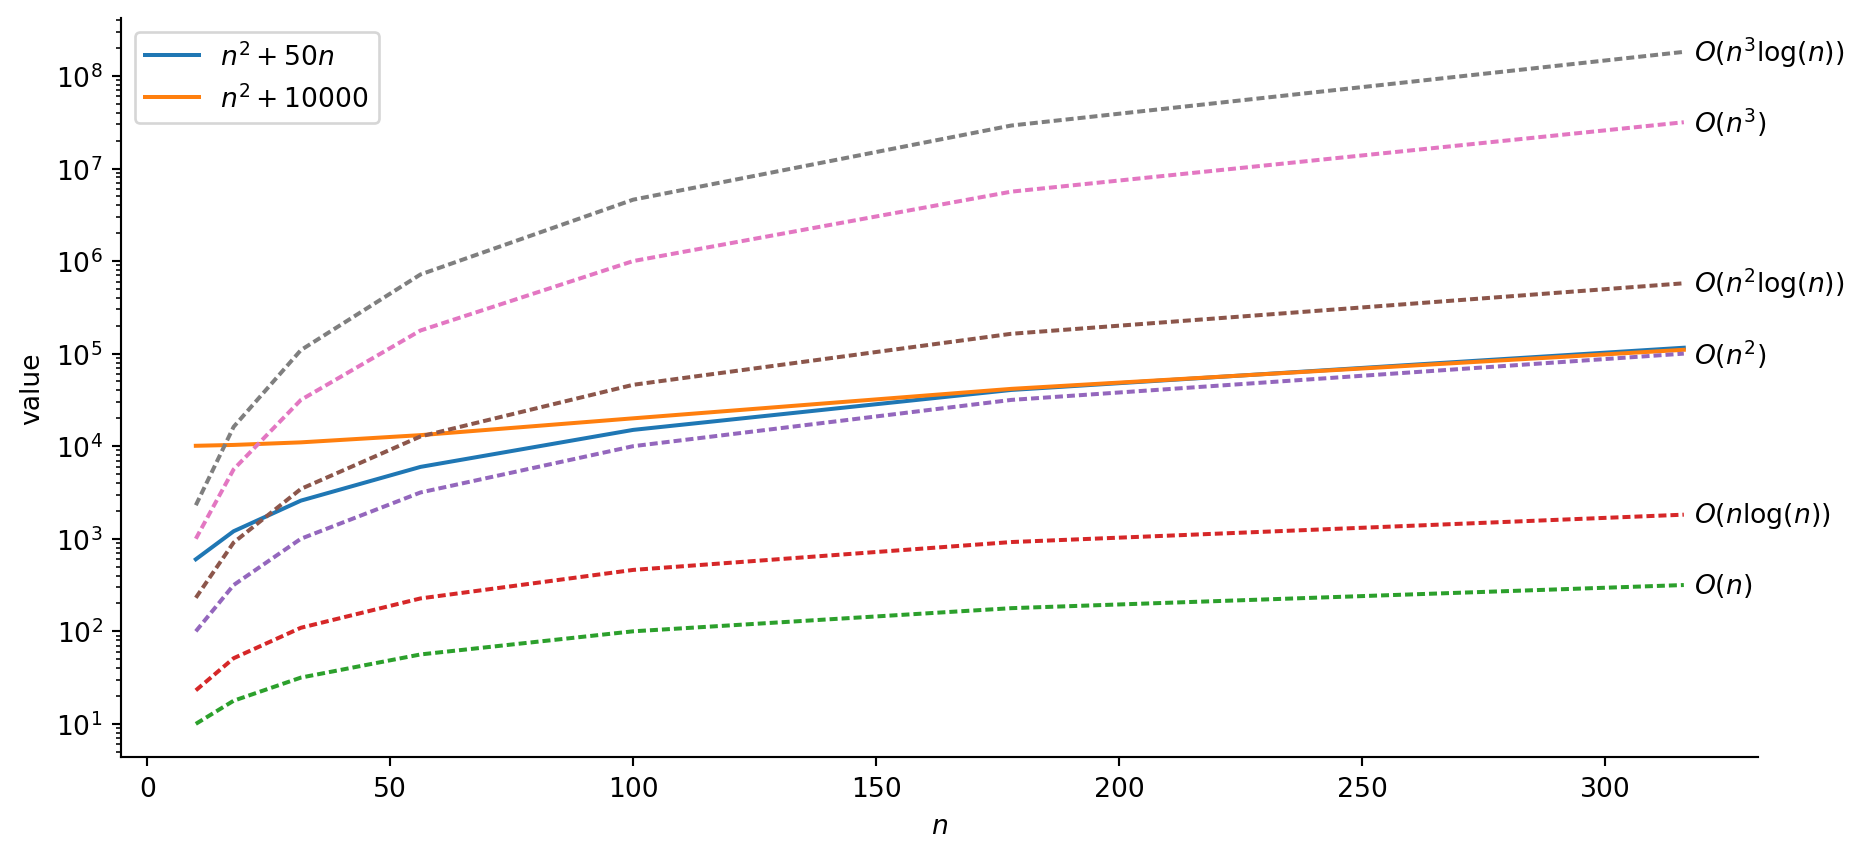

In [1]:
#| code-fold: true
#| fig-align: center
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n_vals = [np.power(10, k) for k in np.arange(1, 2.75, 0.25)]
runtime_df = pd.DataFrame({'$n$': n_vals})
runtime_df['$n^2 + 50n$'] = runtime_df['$n$'].apply(lambda x: np.power(x, 2) + 50*x)
runtime_df['$n^2 + 10000$'] = runtime_df['$n$'].apply(lambda x: np.power(x, 2) + 10000)
runtime_df['$O(n)$'] = runtime_df['$n$'].copy()
runtime_df['$O(nlogn)$'] = runtime_df['$n$'].apply(lambda x: x * np.log(x))
runtime_df['$O(n^2)$'] = runtime_df['$n$'].apply(lambda x: np.power(x, 2))
runtime_df['$O(n^2logn)$'] = runtime_df['$n$'].apply(lambda x: np.power(x,2) * np.log(x))
runtime_df['$O(n^3)$'] = runtime_df['$n$'].apply(lambda x: np.power(x, 3))
runtime_df['$O(n^3logn)$'] = runtime_df['$n$'].apply(lambda x: np.power(x, 3) * np.log(x))
# Get the max values, for labeling the ends of lines
max_vals = runtime_df.max().to_dict()
plot_df = runtime_df.melt(id_vars=['$n$'])
#print(plot_df)
style_map = {col: '' if (col == '$n^2 + 50n$') or (col == '$n^2 + 10000$') else (2,1) for col in runtime_df.columns}
fig, ax = plt.subplots(figsize=(11,5))
sns.lineplot(plot_df, x='$n$', y='value', hue='variable', style='variable', dashes=style_map)
#plt.xscale('log')
plt.yscale('log')
# extract the existing handles and labels
h, l = ax.get_legend_handles_labels()
# slice the appropriate section of l and h to include in the legend
ax.legend(h[0:2], l[0:2])
for label, val in max_vals.items():
  if (label == '$n$') or (label == '$n^2 + 50n$') or (label == '$n^2 + 10000$'):
    continue
  if 'logn' in label:
    label = label.replace('logn', r'\log(n)')
  ax.text(x = max_vals['$n$'] + 2, y = val, s=label, va='center')
# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
plt.show()

* Takeaway: As $n \rightarrow \infty$, **highest-degree terms dominate!**

## Constants On Highest-Degree Terms Also Go Away {.smaller .crunch-title .title-10}

* (Though this is harder to see, without a log-log plot:)


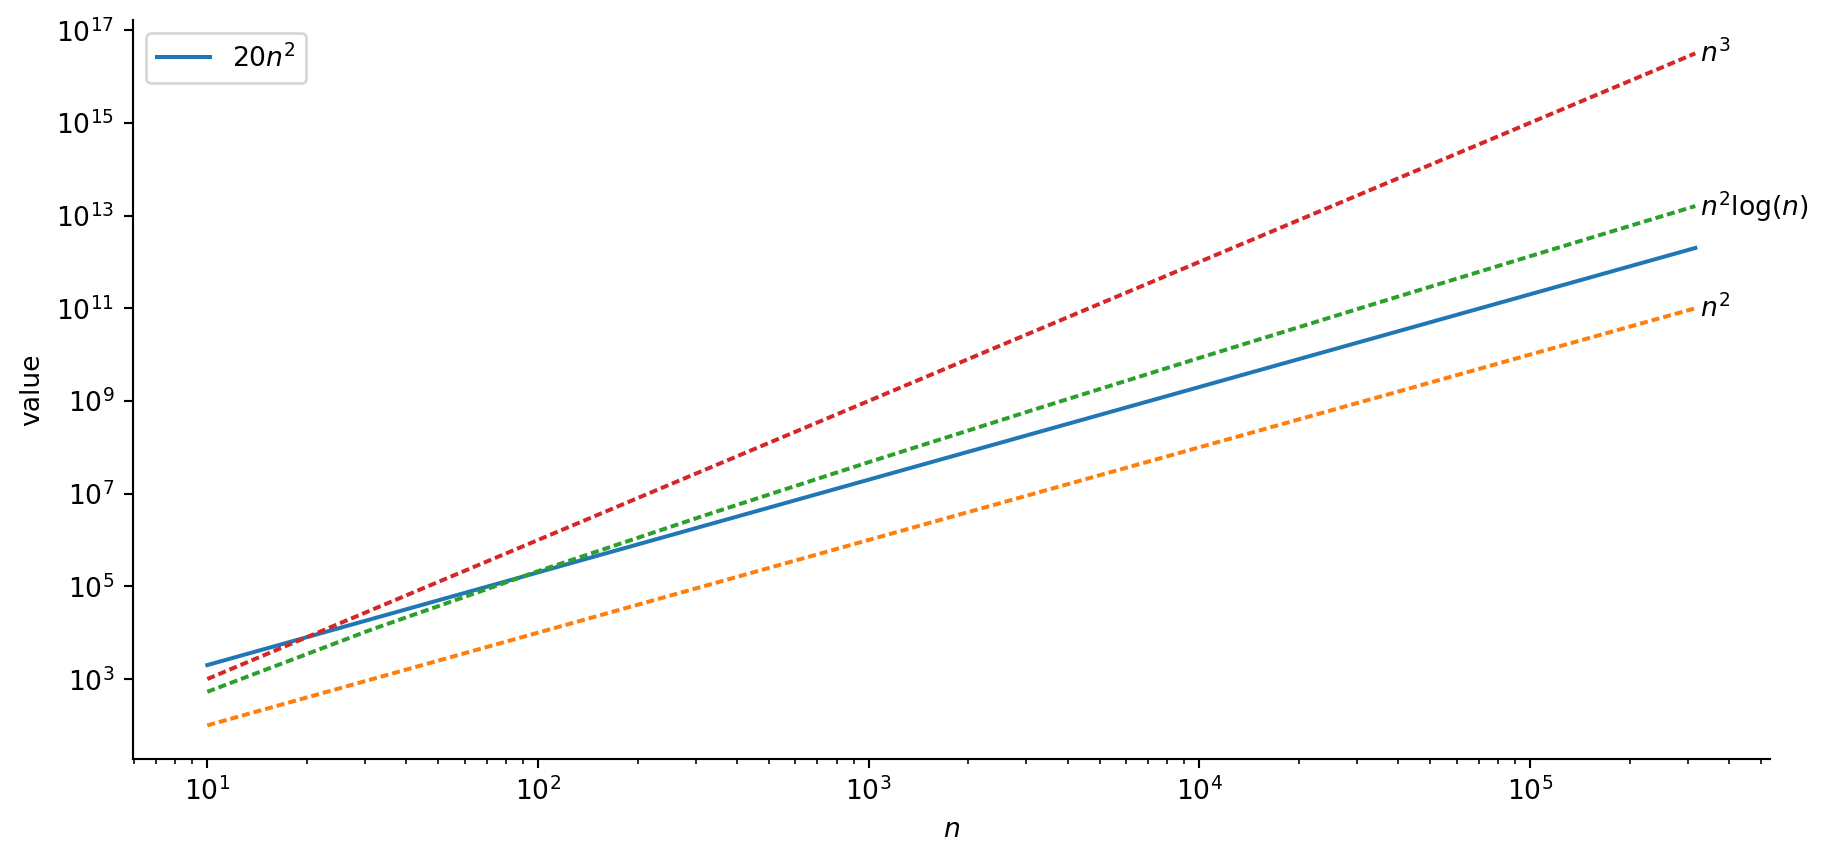

In [2]:
#| code-fold: true
n_vals = [np.power(10, k) for k in np.arange(1, 6, 0.5)]
rt_const_df = pd.DataFrame({'$n$': n_vals})
rt_const_df['$20n^2$'] = rt_const_df['$n$'].apply(lambda x: 20*np.power(x,2))
rt_const_df['$n^2$'] = rt_const_df['$n$'].apply(lambda x: np.power(x,2))
rt_const_df['$n^2logn$'] = rt_const_df['$n$'].apply(lambda x: np.power(x,2) * np.power(np.log(x),2))
rt_const_df['$n^3$'] = rt_const_df['$n$'].apply(lambda x: np.power(x,3))
# Get the max values, for labeling the ends of lines
max_vals = rt_const_df.max().to_dict()
plot_df_const = rt_const_df.melt(id_vars=['$n$'])
style_map = {col: '' if (col == '$20n^2$') else (2,1) for col in rt_const_df.columns}
fig_const, ax_const = plt.subplots(figsize=(11,5))
sns.lineplot(plot_df_const, x='$n$', y='value', hue='variable', style='variable', dashes=style_map)
plt.xscale('log')
plt.yscale('log')
# extract the existing handles and labels
h_const, l_const = ax_const.get_legend_handles_labels()
# slice the appropriate section of l and h to include in the legend
ax_const.legend(h_const[0:1], l_const[0:1])
for label, val in max_vals.items():
  if (label == '$n$') or (label == '$20n^2$'):
    continue
  if 'logn' in label:
    label = label.replace('logn', r'\log(n)')
  ax_const.text(x = max_vals['$n$'] + 10**4, y = val, s=label, va='center')
# Hide the right and top spines
ax_const.spines[['right', 'top']].set_visible(False)
plt.show()

## Formalizing Big-O Notation

* Let $f, g: \mathbb{N} \rightarrow \mathbb{N}$. Then we write $f(n) = O(g(n))$ when there exists a **threshold** $n_0 > 0$ and a **constant** $K > 0$ such that
$$
\forall n \geq n_0 \left[ f(n) \leq K\cdot g(n) \right]
$$
* In words: beyond a certain point $n_0$, $f(n)$ is **bounded above** by $K\cdot g(n)$.
* *Definition from @savage_models_1998[pg. 13]*

## Intuition $\rightarrow$ Proof {.crunch-title .crunch-ul}

* Using this definition, we can now **prove** $f(n) = n^2 + 50n = O(n^2)$!
* Here $f(n) = n^2 + 50n$, $g(n) = n^2$
* **Theorem**: $\exists \; n_0 \; \text{ s.t. } \forall n \geq n_0 \left[ n^2 + 50n \leq Kn^2 \right]$
* **Proof**: Let $K = 50$. Then
$$
\begin{align*}
&n^2 + 50n \leq 50n^2 \iff n + 50 \leq 50n \\
&\iff 49n \geq 50 \iff n \geq \frac{50}{49}.
\end{align*}
$$
* So if we choose $n_0 = 2$, the chain of statements holds. $\blacksquare$

## Bounding Insertion Sort Runtime {.crunch-title .crunch-ul}

* Runs in $T(n) = O(n^2)$ (use constants from prev slide)
* Can similarly define **lower bound** $T(n) = \Omega(f(n))$
  * $O$ = "Big-Oh", $\Omega$ = "Big-Omega"
* Need to be careful with $O(f(n))$ vs. $\Omega(f(n))$ however: difference between "for all inputs" vs. "for some inputs":

::: {.callout-note icon="false" title="Bounding Worst-Case Runtime"}

By saying that the worst-case running time of an algorithm is $\Omega(n^2)$, we mean that for every input size $n$ above a certain threshold, there is **at least one input** of size $n$ for which the algorithm takes at least $cn^2$ time, for some positive constant $n$. It does **not** necessarily mean that the algorithm takes at least $cn^2$ time for **all** inputs.

:::

## Intuition for Lower Bound {.smaller .crunch-title}

* Spoiler: Insertion sort **also** runs in $T(n) = \Omega(n^2)$ time. How could we prove this?
* Given **any value $n > n_0$**, we need to **construct an input** for which Insertion-Sort requires $cn^2$ steps: consider a list where $n/3$ **greatest values** are in **first $n/3$ slots**:

![All $n/3$ values in $\textrm{L}$ pass, one-by-one, through the $n/3$ slots in $\textrm{M}$ (since they must end up in $\textrm{R}$) $\implies (n/3)(n/3) = n^2/9 = \Omega(n^2)$ steps!](images/insertion_lower_bound_alt.svg){fig-align="center" width="600"}

* Final definition (a **theorem** you could prove if you want!): $\Theta$ = "Big-Theta"
  * If $T(n) = \overline{O}(g(n))$ and $T(n) = \Omega(g(n))$, then $T(n) = \Theta(n)$
* $\implies$ **most "informative" way** to characterize insertion sort is $\boxed{T(n) = \Theta(n^2)}$

## Doing Better Than Insertion Sort

* *Intuition Break* 🥳: **Finding a word in a dictionary!** <a href='https://dsan.io/dict-lookup' target='_blank' class='font-monospace'>dsan.io/dict-lookup<i class='bi bi-box-arrow-up-right ps-2'></i></a>

## How Can Merge Sort Work *That* Much Better!? {.crunch-title .title-08 .crunch-ul .crunch-quarto-layout-panel .crunch-quarto-figure}

* With the **linear** approach, each time we check a word and it's not our word we eliminate... one measly word 😞
* But with the **divide-and-conquer** approach... we eliminate 🔥**HALF OF THE REMAINING WORDS**🔥

::: {layout="[1,1]" layout-valign="center"}

![](images/lakers.gif){fig-align="center"}

![](images/tuck_em_in.jpeg){fig-align="center" width="270"}

:::

## Merging Two Sorted Lists in $O(n)$ Time {.smaller .title-11 .crunch-figcaption .crunch-quarto-figure}

![From @cormen_introduction_2001, pg. 37](images/merge.svg){fig-align="center"}

## Merge Sort (Merging as Subroutine)

![From @cormen_introduction_2001, pg. 40](images/merge_tree.svg){fig-align="center"}

## Complexity Analysis {.crunch-title}

* Hard way: re-do the line-by-line analysis we did for <span class='alg'>Insertion-Sort</span> 😣 Easy way: stand on shoulders of giants!
* Using a famous+fun theorem (the **Master Theorem**): Given a recurrence $T(n) = aT(n/b) + f(n)$, compute its:
  * **Watershed function** $W(n) = n^{\log_b(a)}$ and
  * **Driving function** $D(n) = f(n)$
* The Master Theorem gives **closed-form** asymptotic solution for $T(n)$, split into three cases:
* **(1)** $W(n)$ grows **faster** than $D(n)$, **(2)** grows at **same rate** as $D(n)$, or **(3)** grows **slower** than $D(n)$

## Bounding the Runtime of Merge Sort {.crunch-title .crunch-ul .crunch-callout .crunch-footnotes}

* How about <span class='alg'>Merge-Sort</span>? $T(n) = 2T(n/2) + \Theta(n)$
  * $a = b = 2$, $W(n) = n^{\log_2(2)} = n$, $D(n) = \Theta(n)$
* $W(n)$ and $D(n)$ grow at **same rate** $\implies$ *Case 2*[^full]:

::: {.callout-note icon="false" title="Applying the Master Theorem When $W(n) = \Theta(D(n))$ (Case 2)"}

1. Is there a $k \geq 0$ satisfying $D(n) = \Theta(n^{\log_b(a)}\log_2^k(n))$?
2. If so, your solution is $T(n) = \Theta(n^{\log_b(a)}\log_2^{k+1}(n))$

:::

* <span class='alg'>Merge-Sort</span>: $k = 0$ works! $\Theta(n^{\log_2(2)}\log_2^0(n)) = \Theta(n)$
* Thus $T(n) = \Theta(n^{\log_b(a)}\log_2^{k+1}(n)) = \boxed{\Theta(n\log_2n)}$ 😎

[^full]: See [appendix slide](#appendix-the-full-master-theorem) for all 3 cases, if you're some kind of masochist

# Object-Oriented Programming {data-stack-name="OOP"}

## Breaking a Problem into (Interacting) Parts {.title-08 .crunch-title}

* **Python so far**: "Data science mode"
  * Start at top of file with raw data
  * Write lines of code until problem solved
* **Python in this class**: "Software engineering mode"
  * Break system down into parts
  * Write each part separately
  * Link parts together to create the whole
* *(One implication: `.py` files may be easier than `.ipynb` for development!)*

## How Does A Calculator Work?

![(Calculator image from <a href="//commons.wikimedia.org/wiki/User:LoMit" title="User:LoMit">Wikimedia Commons</a>)](images/Calculator.drawio.svg){fig-align="center"}

## Key OOP Feature #1: *Encapsulation*

* Imagine you're on a **team** trying to make a calculator
* One person can write the `Screen` class, another person can write the `Button` class, and so on
* Natural division of labor! (May seem silly for a calculator, but imagine as your app **scales up**)

## Use Case: Bookstore Inventory Management {.smaller .title-12}

![<a href='https://washington.org/visit-dc/bookstores-sure-charm-you-washington-dc' target='_blank'>Image source</a>](images/spencerbeck_exterior-of-capitol-hill-books_yesmydccool.jpg){fig-align="center"}

## In Pictures {.smaller}






```{dot}
//| label: bookstore-diagram
//| echo: false
digraph G {
	graph [
		label="Bookstore Relational Diagram"
		labelloc="t"
	]
	node [
		shape=record,
        fontname="Courier",
	]
    rankdir=LR

	Bookstore[nojustify=false,label = "Bookstore|Name\l|<loc>Location\l|<bl>Booklist\l|Get_Inventory()\l|Sort_Inventory()\l"]

    Place[label="<placehead>Place|City\l|State\l|Country\l|Print_Map()\l"]

    Bookstore:loc -> Place:placehead[label="Has One"];

    Book[label="<bookhead>Book|<title>Title\l|<auths>Authors\l|Num Pages\l|Preview()"]

    Person[label="<personhead>Person|Family Name|Given Name"]

    Bookstore:bl -> Book:bookhead[label="Has Multiple",style="dashed"]
    Book:auths -> Person:personhead[label="Has Multiple",style="dashed"]
}
```






## Creating Classes {.smaller .crunch-title}

* Use case: Creating an inventory system for a **Bookstore**

::: columns
::: {.column width="50%"}


In [3]:
#| label: basic-class
class Bookstore:
    def __init__(self, name, location):
        self.name = name
        self.location = location
        self.books = []

    def __getitem__(self, index):
        return self.books[index]

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        return f"Bookstore[{self.get_num_books()} books]"

    def add_books(self, book_list):
        self.books.extend(book_list)

    def get_books(self):
        return self.books

    def get_inventory(self):
        book_lines = []
        for book_index, book in enumerate(self.get_books()):
            cur_book_line = f"{book_index}. {str(book)}"
            book_lines.append(cur_book_line)
        return "\n".join(book_lines)

    def get_num_books(self):
        return len(self.get_books())

    def sort_books(self, sort_key):
        self.books.sort(key=sort_key)

class Book:
    def __init__(self, title, authors, num_pages):
        self.title = title
        self.authors = authors
        self.num_pages = num_pages

    def __str__(self):
        return f"Book[title={self.get_title()}, authors={self.get_authors()}, pages={self.get_num_pages()}]"

    def get_authors(self):
        return self.authors

    def get_first_author(self):
        return self.authors[0]

    def get_num_pages(self):
        return self.num_pages

    def get_title(self):
        return self.title

class Person:
    def __init__(self, family_name, given_name):
        self.family_name = family_name
        self.given_name = given_name

    def __repr__(self):
        return self.__str__()

    def __str__(self):
        return f"Person[{self.get_family_name()}, {self.get_given_name()}]"

    def get_family_name(self):
        return self.family_name

    def get_given_name(self):
        return self.given_name

:::
::: {.column width="50%"}


In [4]:
#| label: create-objs
my_bookstore = Bookstore("Bookland", "Washington, DC")
plath = Person("Plath", "Sylvia")
bell_jar = Book("The Bell Jar", [plath], 244)
marx = Person("Marx", "Karl")
engels = Person("Engels", "Friedrich")
manifesto = Book("The Communist Manifesto", [marx, engels], 43)
elster = Person("Elster", "Jon")
cement = Book("The Cement of Society", [elster], 311)
my_bookstore.add_books([bell_jar, manifesto, cement])
print(my_bookstore)
print(my_bookstore[0])
print("Inventory:")
print(my_bookstore.get_inventory())

Bookstore[3 books]
Book[title=The Bell Jar, authors=[Person[Plath, Sylvia]], pages=244]
Inventory:
0. Book[title=The Bell Jar, authors=[Person[Plath, Sylvia]], pages=244]
1. Book[title=The Communist Manifesto, authors=[Person[Marx, Karl], Person[Engels, Friedrich]], pages=43]
2. Book[title=The Cement of Society, authors=[Person[Elster, Jon]], pages=311]


:::
:::

## Doing Things With Classes {.smaller}

* Now we can **use** our OOP structure, for example to sort the inventory in different ways!

::: columns
::: {.column width="50%"}

<center>
**Alphabetical (By First Author)**
</center>


In [5]:
#| label: sort-alpha
sort_alpha = lambda x: x.get_first_author().get_family_name()
my_bookstore.sort_books(sort_key = sort_alpha)
print(my_bookstore.get_inventory())

0. Book[title=The Cement of Society, authors=[Person[Elster, Jon]], pages=311]
1. Book[title=The Communist Manifesto, authors=[Person[Marx, Karl], Person[Engels, Friedrich]], pages=43]
2. Book[title=The Bell Jar, authors=[Person[Plath, Sylvia]], pages=244]


:::
::: {.column width="50%"}

<center>
**By Page Count**
</center>


In [6]:
#| label: sort-pages
sort_pages = lambda x: x.get_num_pages()
my_bookstore.sort_books(sort_key = sort_pages)
print(my_bookstore.get_inventory())

0. Book[title=The Communist Manifesto, authors=[Person[Marx, Karl], Person[Engels, Friedrich]], pages=43]
1. Book[title=The Bell Jar, authors=[Person[Plath, Sylvia]], pages=244]
2. Book[title=The Cement of Society, authors=[Person[Elster, Jon]], pages=311]


:::
:::

## Key OOP Feature #2: *Polymorphism* {.smaller .crunch-title}

* Encapsulate **general properties** in **parent** class, **specific properties** in **child classes**

![(You can edit this or make your own UML diagrams in <a href='https://www.nomnoml.com/#view/%5B%3Cabstract%3E%20Vehicle%7C%0A%20%20numDoors%3A%20int%3B%20numWheels%3A%20int%3B%20balanced%3A%20bool%3B%7C%0A%20%20turnOn()%3B%20accelerate()%3B%20brake()%3B%20turnOff()%3B%0A%5D%0A%5BMotorcycle%7CnumDoors%20%3D%200%3BnumWheels%20%3D%202%3B%20balanced%20%3D%20false%3B%5D%0A%5B%3Cabstract%3E%20Car%7CnumWheels%20%3D%204%3Bbalanced%20%3D%20true%3B%5D%0A%5BCoupe%7CnumDoors%20%3D%202%3B%5D%0A%5BSedan%7CnumDoors%20%3D%204%3B%5D%0A%5BTruck%7CnumDoors%20%3D%202%3BnumWheels%20%3D%2018%3Bbalanced%20%3D%20true%3B%5D%0A%0A%5BVehicle%5D-%3A%3E%5BMotorcycle%5D%0A%5BVehicle%5D--%3A%3E%5BCar%5D%0A%5BVehicle%5D-%3A%3E%5BTruck%5D%0A%5BCar%5D-%3A%3E%5BCoupe%5D%0A%5BCar%5D-%3A%3E%5BSedan%5D%0A' target='_blank'>nomnoml<i class='bi bi-box-arrow-up-right ps-1'></i></a>!)](images/vehicle-basic.svg){fig-align="center"}

## Or... Is This Better? {.smaller .crunch-title}

![Edit in <a href='https://www.nomnoml.com/#view/%5B%3Cabstract%3E%20Vehicle%7CnumDoors%3A%20int%3BnumWheels%3A%20int%3Bbalanced%3A%20bool%3B%7CturnOn()%3Baccelerate()%3Bbrake()%3BturnOff()%3B%5D%0A%5B%3Cabstract%3E%20UnbalancedVehicle%7Cbalanced%20%3D%20false%3B%5D%0A%5B%3Cabstract%3E%20BalancedVehicle%7Cbalanced%20%3D%20true%3B%5D%0A%5BMotorcycle%7CnumDoors%20%3D%200%3BnumWheels%20%3D%202%3B%5D%0A%5B%3Cabstract%3E%20Car%7CnumWheels%20%3D%204%3B%5D%0A%5BCoupe%7CnumDoors%20%3D%202%3B%5D%0A%5BSedan%7CnumDoors%20%3D%204%3B%5D%0A%5BTruck%7CnumDoors%20%3D%202%3BnumWheels%20%3D%2018%3B%5D%0A%0A%5BVehicle%5D--%3A%3E%5BUnbalancedVehicle%5D%0A%5BUnbalancedVehicle%5D-%3A%3E%5BMotorcycle%5D%0A%5BVehicle%5D--%3A%3E%5BBalancedVehicle%5D%0A%5BBalancedVehicle%5D--%3A%3E%5BCar%5D%0A%5BBalancedVehicle%5D-%3A%3E%5BTruck%5D%0A%5BCar%5D-%3A%3E%5BCoupe%5D%0A%5BCar%5D-%3A%3E%5BSedan%5D%0A' target='_blank'>nomnoml<i class='bi bi-box-arrow-up-right ps-1'></i></a>](images/vehicle-fancy.svg){fig-align="center"}

## Design Choices {.smaller}

* The goal is to **encapsulate** as best as possible: which **objects** should have which **properties**, and which **methods**?
* Example: Fiction vs. Non-Fiction. How important is this distinction **for your use case?**

::: columns
::: {.column width="50%"}

<center>
**Option 1: As Property of `Book`**
</center>


In [7]:
#| label: fiction-property
from enum import Enum
class BookType(Enum):
    NONFICTION = 0
    FICTION = 1

class Book:
    def __init__(self, title: str, authors: list[Person], num_pages: int, type: BookType):
        self.title = title
        self.authors = authors
        self.num_pages = num_pages
        self.type = type

    def __str__(self):
        return f"Book[title={self.title}, authors={self.authors}, pages={self.num_pages}, type={self.type}]"

In [8]:
#| label: use-fiction-property
joyce = Person("Joyce", "James")
ulysses = Book("Ulysses", [joyce], 732, BookType.FICTION)
schelling = Person("Schelling", "Thomas")
micromotives = Book("Micromotives and Macrobehavior", [schelling], 252, BookType.NONFICTION)
print(ulysses)
print(micromotives)

Book[title=Ulysses, authors=[Person[Joyce, James]], pages=732, type=BookType.FICTION]
Book[title=Micromotives and Macrobehavior, authors=[Person[Schelling, Thomas]], pages=252, type=BookType.NONFICTION]


:::
::: {.column width="50%"}

<center>
**Option 2: Separate Classes**
</center>


In [9]:
#| label: fiction-separate-classes-setup
#| echo: false
class Book:
    def __init__(self, title, authors, num_pages):
        self.title = title
        self.authors = authors
        self.num_pages = num_pages

    def __str__(self):
        return f"Book[title={self.get_title()}, authors={self.get_authors()}, pages={self.get_num_pages()}]"

    def get_authors(self):
        return self.authors

    def get_first_author(self):
        return self.authors[0]

    def get_num_pages(self):
        return self.num_pages

    def get_title(self):
        return self.title

In [10]:
#| label: fiction-separate-classes
# class Book defined as earlier
class FictionBook(Book):
    def __init__(self, title, authors, num_pages, characters):
        super().__init__(title, authors, num_pages)
        self.characters = characters

class NonfictionBook(Book):
    def __init__(self, title, authors, num_pages, topic):
        super().__init__(title, authors, num_pages)
        self.topic = topic

In [11]:
#| label: use-fiction-separate-classes
joyce = Person("Joyce", "James")
ulysses = FictionBook("Ulysses", [joyce], 732, ["Daedalus"])
schelling = Person("Schelling", "Thomas")
micromotives = NonfictionBook("Micromotives and Macrobehavior", [schelling], 252, "Economics")
print(ulysses)
print(micromotives)

Book[title=Ulysses, authors=[Person[Joyce, James]], pages=732]
Book[title=Micromotives and Macrobehavior, authors=[Person[Schelling, Thomas]], pages=252]


:::
:::

# HW1: Python Fundamentals {data-name="HW1"}

* <a href='https://classroom.google.com/c/NjM5MzE2MTE4NTgx' target='_blank'>Google Classroom <i class='bi bi-box-arrow-up-right ps-1'></i></a>

## References

::: {#refs}
:::

## Appendix: The Full Master Theorem {.smaller .crunch-title .crunch-ol}

**Master Theorem**: Let $a > 0$ and $b > 1$ be constants, and let $f(n)$ be a driving function defined and nonnegative on all sufficiently large reals. Define $T(n)$ on $n \in \mathbb{N}$ by

$$
T(n) = aT(n/b) + f(n)
$$

where $aT(n/b) = a'T(\lfloor n/b \rfloor) + a''T(\lceil n/b \rceil)$ for some $a' \geq 0$ and $a'' \geq 0$ satisfying $a = a' + a''$. Then the asymptotic behavior of $T(n)$ can be characterized as follows:

1. If there exists $\epsilon > 0$ such that $f(n) = O(n^{\log_b(a) - \epsilon})$, then $T(n) = \Theta(n^{\log_b(a)})$
2. If there exists $k \geq 0$ such that $f(n) = \Theta(n^{\log_b(a)}\log_2^k(n))$, then $T(n) = \Theta(n^{\log_b(a)}\log_2^{k+1}(n))$.
3. If there exists $\epsilon > 0$ such that $f(n) = \Omega(n^{\log_b(a) + \epsilon})$, and if $f(n)$ satisfies the **regularity condition** $af(n/b) \leq cf(n)$ for some constant $c < 1$ and all sufficiently large $n$, then $T(n) = \Theta(f(n))$.

::: {.proof}
See @cormen_introduction_2001, pg. 107-114.
:::

*([&larr; Back to Merge Sort slides](#bounding-the-runtime-of-merge-sort))*